# 04. 머신러닝의 기초-이진분류
* **<font color="red"> 이진분류 Binary Classification </font>** : 샘플의 데이터를 T/F인지 판단하는 것

        4-1. 초기AI와 로지스틱 회귀 알아보기
        4-2. sigmoid함수로 확률만들기
        4-3. 로지스틱 손실함수를 경사하강법에 적용하기
        4-4. 분류용 데이터세트 준비하기
        4-5. 로지스틱 회귀 위한 뉴런만들기
        4-6. 로지스틱 회귀 뉴런으로 단일층 신경망 만들기
        4-7. sklearn으로 로지스틱 회귀 수행하기

## 4-1. 초기AI와 로지스틱 회귀 알아보기
### 4-1-1. 초기AI
<font color="red"> * **Perceptron**<font size=1>(초기AI-1)</font> :</font>이진분류 문제에서 {w}찾는 알고리즘.
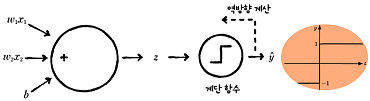

<font size=3><font color ="green"> 
- 이진분류에서도 {x,y}가  있으나 데이터 {x}를 잘 표현하는 선형방정식은 $\small{\hat{y}}$가 아닌 $z=wx+b$로 정의한다.<br />
- target은 "y = T/F (1/0)"이고 이를 예측하는 $\small{\hat{y}}$는 계단함수(arg=$z$)로 정해진다.<br />
- {w,b}를 찾기위해 사용하는 손실함수는 최종예측인 $\small{\hat{y}}$를 기반으로 한다.</font></font>


<font color="red"> * **Adaline </font>**<font size=1>(초기AI-2)</font> :perceptron을 개선한 적응형 선형뉴런.
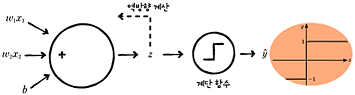
<font size=3><font color ="green">   
- {w,b}를 찾기위해 사용하는 손실함수는 선형함수인 $z$를 기반으로 한다.</font>

### 4-1-2. 로지스틱 회귀  
    
<font color="red"> * **Logistic Regression**</font> : Adaline에서 더 발전한 형태.
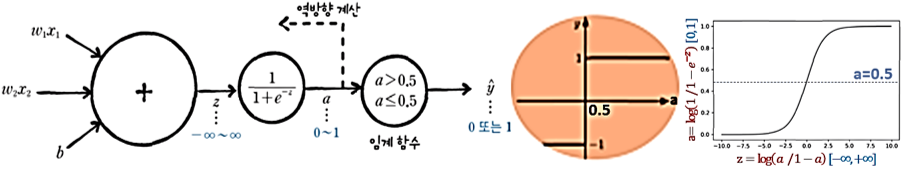
    
<font size="3"><font color="green">
- 선형함수($z$)값을 기반으로 예측분류를 한다. 그런데, $z$의 범위는 -$\small{\infty}$~+$\small{\infty}$이라서 다루기 어렵다.<br /> 
- 따라서, 선형함수($z$)의  -$\small{\infty}$ ~ +$\small{\infty}$을 활성화함수($a$)의 0~1로 projection 한다.<br />
- target 은 역시 1/0이고, 이를 예측하는 $\small{\hat{y}}$는 임계함수(arg=$a$)로 정해진다.<br />
- {w,b}를 찾기위해 사용하는 손실함수는 활성화함수인 $a$를 기반으로 한다.
    

## 4-2. sigmoid함수로 확률만들기
<font color="red"> * **Sigmoid 함수** </font> :선형함수$z$를 활성화함수$a$로 변환하는데 이 때 $a(z)$는 logistic 또는 sigmoid함수다.
<font size=3><font color ="green"> 

|  Odds Ratio |&emsp;&emsp;&emsp;&emsp;선형함수 (z) | &emsp;&emsp;&emsp;&emsp;활성화함수 (a) |&ensp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;logistic loss함수 (loss)    |
|:------------------------:|---------------------------:|-------------------------:|--------------------------------------------------------------------------:|
| OR = $\dfrac{a}{1-a}$ | $logit(a)$ = $\log{\left(\dfrac{a}{1-a}\right)}$ | $logistic(z)$ = $\dfrac{1}{1+e^{-z}}$ | $loss=-y\log{(a)}-(1\!-\!y)\log{(1\!-\!a)}$ |
|  | $z=wx+b$ | (sigmoid함수) $a$ | |
|  |$\small{\big\{ \frac{\partial}{\partial w},\frac{\partial}{\partial b}\big\}z=\{x,1\}}$|$\small{\frac{\partial}{\partial z}a=a^2 \cdot e^{-\!z}=a(1\!-\!a)}$|$\frac{\partial}{\partial a}\text{loss}=-\frac{(y-a)}{a\cdot(1-a)}$
    
- $a$=성공확률 (또는 활성화함수)

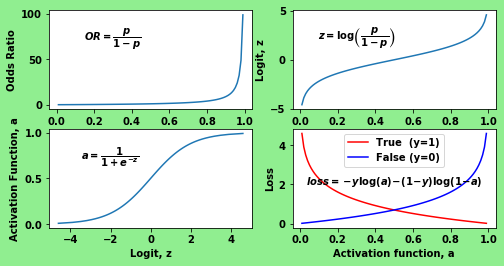

In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt
odd        = [ item*0.01 for item in range (0,101)]
p=[];OR=[];z=[];a=[];loss_true=[];loss_fail=[]
i=0
for item in odd:
    if (1-item==0): continue
    odds_ratio = item/(1-item);
    if (odds_ratio==0): continue      
    logit = math.log(odds_ratio);
    if (1+math.exp(-logit)==0):continue
    logistic   = 1/(1+math.exp(-logit));
    if (1-logistic==0)or(logistic==0):continue
    p.append(item);OR.append(odds_ratio);z.append(logit);a.append(logistic)
    loss_true.append(-math.log(logistic))
    loss_fail.append(-math.log(1-logistic))
    
fig=plt.figure(figsize=(8,4));fig.patch.set_facecolor("lightgreen")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
p1=plt.subplot(221);p1.plot(p,OR);p1.set_xlabel("Odd of Success");p1.set_ylabel("Odds Ratio");
p1.text(0.3,70,r'$OR=\dfrac{p}{1-p}$',ha='center')
p2=plt.subplot(222);p2.plot(p,z);p2.set_xlabel("Odd of Success");p2.set_ylabel("Logit, z")
p2.text(0.3,2,r'$z=\log{\left(\dfrac{p}{1-p}\right)}$',ha='center')
p3=plt.subplot(223);p3.plot(z,a);p3.set_xlabel("Logit, z");p3.set_ylabel("Activation Function, a")
p3.text(-2,0.7,r'$a=\dfrac{1}{1+e^{-z}}$',ha='center')
p4=plt.subplot(224);p4.plot(a,loss_true,color='red',label="True  (y=1)");
p4.plot(a,loss_fail,color='blue',label="False (y=0)");
p4.set_ylabel("Loss");p4.set_xlabel("Activation function, a");
p4.text(0.5,2,r'$loss=-\!y\log{(a)}\!-\!(1\!-\!y)\log{(1\!-\!a)}$',ha='center')
p4.legend();plt.show()

## 4-3. 로지스틱 손실함수를 경사하강법에 적용하기
<font size=3> 
* **선형회귀**의 목적&emsp;&emsp; : 데이터 반영하는 선형함수 {w,b} 찾기.<br />
    &emsp;&emsp;&emsp;&emsp;<font color="green"> - 미분가능한 손실함수(제곱오차)를 최소화되도록 경사하강법으로 {w,b}조정한다.<br />
    &emsp;&emsp;&emsp;&emsp; $\small{\text{loss}=\frac{1}{2}(y-\hat{y})^2}$<br />
    &emsp;&emsp;&emsp;&emsp; $ \small{\{w,b\}-=\big\{\frac{\partial}{\partial w},\frac{\partial}{\partial b}\big\}\text{loss}=\big\{\frac{\partial \hat{y}}{\partial w},\frac{\partial \hat{y}}{\partial b}\big\}}\frac{\partial}{\partial \hat{y}}\text{loss}=\{x,1\}\cdot\{-(y\!-\!\hat{y})\}$</font><br />
* **로지스틱회귀**의 목적 : 올바르게 분류된 샘플의 비율 높이기.1을1로, 0를0로...<br />
     &emsp;&emsp;&emsp;&emsp;<font color="red"> - **그러나!!!** 미분가능한 손실함수(for  이런비율)아니라서 경사하강법 적용못함.<br /> 
    &emsp;&emsp;&emsp;&emsp; - **대신에!!!** 비슷한 목적을 달성하면서 미분가능한 손실함수(로지스틱)을 사용한다.<br />
    &emsp;&emsp;&emsp;&emsp;$\small{\text{loss}=-y\log{(a)}+(1\!-\!y)\log{(1\!-\!a)}}$<br />
    &emsp;&emsp;&emsp;&emsp;$\small{\{w,b\}-=\big\{\frac{\partial}{\partial w},\frac{\partial}{\partial b}\big\}\text{loss}=\big\{\frac{\partial z}{\partial w},\frac{\partial z}{\partial b}\big\}\frac{\partial a}{\partial z}\frac{\partial}{\partial a}\text{loss}}$ <br />
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\small{=\{x,1\}\cdot a(1\!-\!a)\cdot \big\{ \!-\!\frac{(y-a)}{a(1-a)}\big\}=\{x,1\}\cdot\{-(y-a)\}}$ <br />
    
    
    

## 4-4. 분류용 데이터세트 준비하기
<font size=3> 
* **Breast Cancer** 데이터 : T (==positive==악성종양/양성) vs. F (==negative==양성종양/음성) 구별하는 것이 목적<br />
* 데이터 살펴보자.

Dataset Breast Cancer consist of 	: ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
Data shape= (569, 30) 		:
            mean radius|            mean texture|          mean perimeter|               mean area|         mean smoothness| 
       mean compactness|          mean concavity|     mean concave points|           mean symmetry|  mean fractal dimension| 
           radius error|           texture error|         perimeter error|              area error|        smoothness error| 
      compactness error|         concavity error|    concave points error|          symmetry error| fractal dimension error| 
           worst radius|           worst texture|         worst perimeter|              worst area|        worst smoothness| 
      worst compactness|         worst concavity|    worst concave points|          worst symmetry| worst fractal dimension| 


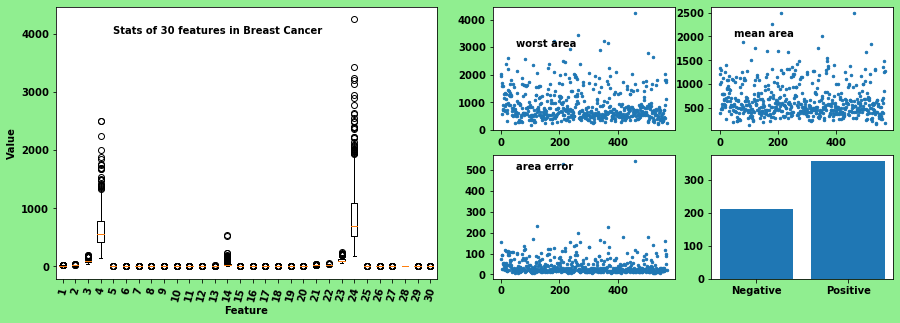

In [9]:
from sklearn.datasets import load_breast_cancer
from scipy.stats import rankdata
cancer=load_breast_cancer(); data=cancer.data; target=cancer.target
print("Dataset Breast Cancer consist of \t:",dir(cancer))#당뇨병 데이터셋의 attibutes 리스트겟
print("Data shape=",np.shape(data),"\t\t:")
#print features neatly using %40s
wid=max(len(s) for s in cancer.feature_names);swid='%'+str(wid)+'s'
for i in range(0,int(np.shape(data)[1]/5)):
    for j in range(i*5,i*5+5):
        if(j==np.shape(data)[1]):break
        print (swid % cancer.feature_names[j],sep='/t ', end='| ', flush=True) 
    print("")
#widely spread ones are crucial. Pick them to display by using std,rankdata.astype
features_std=[];rank=[]
for i in range(0,len(cancer.feature_names)):features_std.append(np.std(data[:,i]))
std_rank=len(features_std)-rankdata(features_std).astype(int);#높은수->낮은수 순서(astype없애면 Low 2 High)
for i in range(0,3):rank.append(np.where(std_rank==i)[0])
  

fig = plt.figure(figsize=(15,5 ));fig.patch.set_facecolor('lightgreen')
plt.rcParams["font.weight"]='bold'
plt.rcParams["axes.labelweight"]='bold'
p1=plt.subplot(121);p1.boxplot(data,vert=True);p1.set_xlabel('Feature');p1.set_ylabel('Value')
p1.text(5,4000,'Stats of 30 features in Breast Cancer')
plt.setp(plt.xticks()[1], rotation=75)

p2=plt.subplot(243);p2.scatter([i for i in range(0,len(data[:,rank[0]]))],data[:,rank[0]],s=6);
p2.text(50,3000,cancer.feature_names[rank[0]][0])
p3=plt.subplot(244);p3.scatter([i for i in range(0,len(data[:,rank[1]]))],data[:,rank[1]],s=6);
p3.text(50,2000,cancer.feature_names[rank[1]][0])
p4=plt.subplot(247);p4.scatter([i for i in range(0,len(data[:,rank[2]]))],data[:,rank[2]],s=6);
p4.text(50,500,cancer.feature_names[rank[2]][0])

#-------------
label = ['Negative(F)', 'Positive(T)']
index = np.arange(len(label))
p5=plt.subplot(248);p5.bar(index,np.unique(target,return_counts=True)[1])
p5.set_xticks([0,1])
p5.set_xticklabels(['Negative','Positive'])
plt.show()


## 4-5. 로지스틱 회귀위한 뉴런만들기
#### 4-5-1. 평가를 위해서 데이터 나누기 : Train vs. Test
<font size=3> 
* <font color = 'red'>**실전성능 Generalization Performance**</font>  : 데이터 분석 훈련을 통해서 분류하는 알고리즘을 완성했다고 치자. 그럼 그 성능을 어떻게 평가할까? 바로 훈련에 사용되지 않은 새로운 데이터에 적용하여 평가를 한다.<br />
* <font color = 'red'>**데이터 나누기 Data =  Train(8) : Test(2)**</font>  : sklearn의 split이용해서 나눈다.<font color ='green'>
    - Train > Test : 항상 훈련 데이터를 더 많이 확보하게 한다.<br />
    - 훈련/테스트데이터의 F:T비율은 나누기 전 데이터의 F:T와 동일하게 한다.</font><br />
* <font color = 'cyan'>**<split 사용법>**</font>  : <font color ='lightblue'>
    - stratify=y : 이 변수의 F:T비율로 Train/Test의 F:T비율을 맞춘다.<br />
    - test_size=0.2 : 데이터양을 Train:Test=8:2로 하겠다.<br />
    - random_state=42 : 무작위 섞은 결과 늘 다르게(default실전)/같게(42책비교위해) </font>


In [10]:
from sklearn.model_selection import train_test_split
x=data;y=target
xr, xs,yr,ys = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
print ("Train:Test=",len(xr),':',len(xs),'=',int(round(len(xr)/len(xs),0)),':1')
u=np.unique(y,return_counts=True)
ur=np.unique(yr,return_counts=True)
us=np.unique(ys,return_counts=True)
print('F:T for data | train| test = \n\t1:',int(round(u[1][1]/u[1][0])),"| 1:",\
      int(round(ur[1][1]/ur[1][0])),"| 1:",int(round(us[1][1]/us[1][0])))

Train:Test= 455 : 114 = 4 :1
F:T for data | train| test = 
	1: 2 | 1: 2 | 1: 2


#### 4-5-2. 로지스틱 회귀 구현하기

In [12]:
import scipy
class Neuron_Logistic:
    def __init__(self):
        self.w=None;self.b=None
    def forpass(self,x):     return np.sum(x*self.w)+self.b  # z = {w}{x}+{b}
    def backprop(self,x,err):return -x*err,-1*err            # {w_grad} = -{x}*{err}, {b_grad}=-1*{err}
    #def activation(self,z):  return 1/(1+np.exp(-z))         # a = 1/(1+exp(-z))
    def activation(self,z):  return scipy.special.expit(z)    # fix the overflow warning
    def fit(self,x,y,epochs=100):
        xcol=np.shape(x)[1];self.w=np.ones(xcol);self.b=0
        for i in range(epochs):
            for j in range(0,len(y)):
                z=self.forpass(x[j]); a=self.activation(z);
                err=y[j]-a                                    # err = y-a
                w_grad,b_grad=self.backprop(x[i],err)         
                self.w-=w_grad; self.b-=b_grad                # w = w-w_grad, b=b-b_grad
    def predict(self,x_new):
        z=np.array([self.forpass(x) for x in x_new])       
        a=self.activation(z)
        return a>0.5                                          # y_hat= {a>0.5}
#--------------------------------------
# 만든 뉴런이용해서 훈련>평가>예측 해보자
#--------------------------------------
neuron = Neuron_Logistic()
neuron.fit(xr,yr)                  #1. 훈련시킴
print("Neuron_Logistic's Test Score = ",round(np.mean(neuron.predict(xs)==ys),2))    #2. 테스트

Neuron_Logistic's Test Score =  0.63


## 4-6. 로지스틱 회귀 뉴런으로 단일층 신경망 만들기
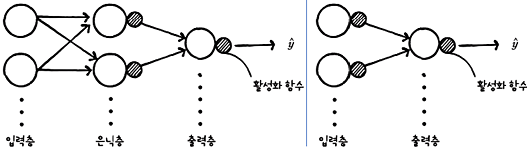 
<font size =3>
* **일반 신경망 (General)** : 입력/은닉/출력 층으로 되어있고 hidden layer는 보통 여러층이다.
* **단일 신경망 (Single Layer)** : 은닉층이 없는 가장 단순한 형태이다.<br />
 <font color='cyan'>
* **단일 신경망 구현** : 앞에서 구현한 Neuron_Logistic에 여러 기능을 추가하여 이름만 Layer_Single이라고 함.<br />
&emsp;&emsp;&emsp;- 데이터 훈련시, 순서대로가 아닌 랜덤으로 순서정함.<br />
&emsp;&emsp;&emsp;- a를 구할 때 clip해서 log계산 에러 안나게 한다.<br />
&emsp;&emsp;&emsp;- 손실함수를 기록한다. <br />
&emsp;&emsp;&emsp;- 훈련 후 optimized된 {w,b}에 test set을 적용, 분류 score를 도출한다.  


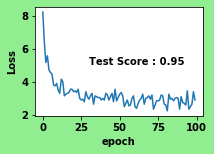

In [13]:
class Layer_Single:
    def __init__(self):
        self.w=None;self.b=None;self.losses=[]
    def forpass(self,x):return np.sum(x*self.w)+self.b
    def backprop(self,x,err):return -x*err,-1*err
    #def activation(self,z):return 1/(1+np.exp(-z))
    def activation(self,z):return scipy.special.expit(z)
    def loss(self,a,y):return -y*np.log(a)-(1-y)*np.log(1-a)
    def fit(self,x,y,epochs=100):
        xlen=np.shape(x)[0];xcol=np.shape(x)[1]
        self.w=np.ones(xcol);self.b=0
        for epoch in range(0,epochs):
            loss_per_epoch=0
            idx=np.random.permutation(np.arange(xlen))
            for i in idx:
                z=self.forpass(x[i]);a=self.activation(z)
                err=y[i]-a;w_grad,b_grad=self.backprop(x[i],err)
                self.w-=w_grad;self.b-=b_grad
                a=np.clip(a,1e-10,1-1e-10)
                loss_per_epoch+=self.loss(a,y[i])
            self.losses.append(loss_per_epoch/xlen)
    def predict(self,xnew):
        z=np.array([self.forpass(x) for x in xnew])
        a=self.activation(z)
        return a>0.5
    def score(self,x,y):return np.mean(self.predict(x)==y)

layer=Layer_Single();layer.fit(xr,yr)
text="Test Score : "+str(round(layer.score(xs,ys),2))
fig=plt.figure(figsize=(3,2));fig.patch.set_facecolor("lightgreen")
plt.plot(layer.losses);plt.xlabel("epoch");plt.ylabel("Loss");
plt.text(30,5,text);plt.show()

## 4-7. sklearn으로 로지스틱 회귀 수행하기
여지껏 만든 Layer_Single은 사실 sklearn에 이미 구현되어있다 in SDGClassifier
* **<font color='red'>Hyper Parameters**</font> : 결과에 영향있는 요소중 사람이 선택해야할, {w,b}처럼 기계학습 안되는 변수

<font size=3><font color='cyan'>
&emsp;&emsp;&emsp;- loss : logistic('log'), SVM('hinge'),... <br />
&emsp;&emsp;&emsp;- max_iter : 반복횟수 (=epochs)<br />
&emsp;&emsp;&emsp;- random_state : 필요없지만 결과 비교위해서<br />
&emsp;&emsp;&emsp;- tol : loss가 최적의 값 (=tol) 만큼 감소하지 않으면 max_iter를 늘리라는 경고문 뜬다.</font>
    

In [14]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log',max_iter=100,tol=1e-3,random_state=42)
sgd.fit(xr,yr);
sgd2=SGDClassifier(loss='hinge',max_iter=100,tol=1e-3,random_state=42)
sgd2.fit(xr,yr);
print("Test Score using SGDClassifier with Logistic Loss =",round(sgd.score(xs,ys),2))
print("Test Score using SGDClassifier with    SVM   Loss =",round(sgd2.score(xs,ys),2))
print("--------------------------------------")
print("Predict for 10 test set x[0:10] using Logistic = ",sgd.predict(xs[0:10]))
print("                      real targets for x[0:10] = ",ys[0:10])
print("Predict for 10 test set x[0:10] using    SVM   = ",sgd2.predict(xs[0:10]))
print("--------------------------------------")
print("80% (Logistic) & 90%(SVM) of the prediction were correct!!!! NOT BAD!!!")

Test Score using SGDClassifier with Logistic Loss = 0.83
Test Score using SGDClassifier with    SVM   Loss = 0.94
--------------------------------------
Predict for 10 test set x[0:10] using Logistic =  [0 1 0 0 0 0 1 0 0 0]
                      real targets for x[0:10] =  [0 1 0 1 0 1 1 0 0 0]
Predict for 10 test set x[0:10] using    SVM   =  [0 1 1 1 0 1 1 0 0 0]
--------------------------------------
80% (Logistic) & 90%(SVM) of the prediction were correct!!!! NOT BAD!!!
